In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Display Null Count Function

In [3]:
def count_null(df):
    null_df = pd.DataFrame(df.isnull().sum(), columns=["Count"])
    display(null_df[null_df["Count"] > 0])

### Missing Values

In [4]:
count_null(train)
count_null(test)

,Count
Age,177
Cabin,687
Embarked,2


,Count
Age,86
Fare,1
Cabin,327


### Handle Missing Cabin

In [5]:
train["Cabin"] = train["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)
test["Cabin"] = test["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)

In [6]:
count_null(train)
count_null(test)

,Count
Age,177
Embarked,2


,Count
Age,86
Fare,1


### Handle Missing Embarked Port

In [7]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = train["Embarked"].mode()[0]

In [8]:
count_null(train)
count_null(test)

,Count
Age,177


,Count
Age,86
Fare,1


### Handle Missing Fare

In [9]:
test.loc[test['Fare'].isnull(), 'Fare'] = train['Fare'].median()
count_null(train)
count_null(test)

,Count
Age,177


,Count
Age,86


### Handling Age

#### New Features Functions

In [10]:
def add_new_title(df):
    # Grouping Title
    new_title = {
        'Mr' : 'Mr','Ms' : 'Ms','Mrs' : 'Mrs','Rev' : 'officer','Sir' : 'royalty','theCountess' : 'royalty','Dona' : 'royalty','Capt' : 'officer','Col' : 'officer','Don' : 'royalty','Dr' : 'officer','Jonkheer' : 'royalty','Lady' : 'royalty','Major' : 'officer','Master' : 'kid','Miss' : 'Ms','Mlle' : 'Ms','Mme' : 'Mrs'
    }

    #Add Title
    df['title'] = df['Name'].apply(lambda x: x.split(",")[1])
    df['title'] = df['title'].apply(lambda x: x.split(".")[0])
    df.title = df.title.str.replace(' ', '')
    # Group Title
    df['title'] = df['title'].apply(lambda x: new_title[x])
    
def add_cabin_section(df):
    df["Cabin"] = df["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)
    df["Cabin_Section"] = df['Cabin'].str[0]

In [11]:
def add_new_features(df):
    df["Family_Name"] = df['Name'].str.split(',', 1, expand=True)[0]
    df["Family_Size"] = df["SibSp"] + df["Parch"] + 1
    df["Ticket_Group_Size"] = df.groupby('Ticket')['Ticket'].transform('count')
    add_new_title(df)
    add_cabin_section(df)

#### Add New Feature

In [12]:
all_data = pd.concat([train, test], sort=False)
add_new_features(all_data)
train = all_data[0:891]
test = all_data[891:]

#### Correlation Matrix

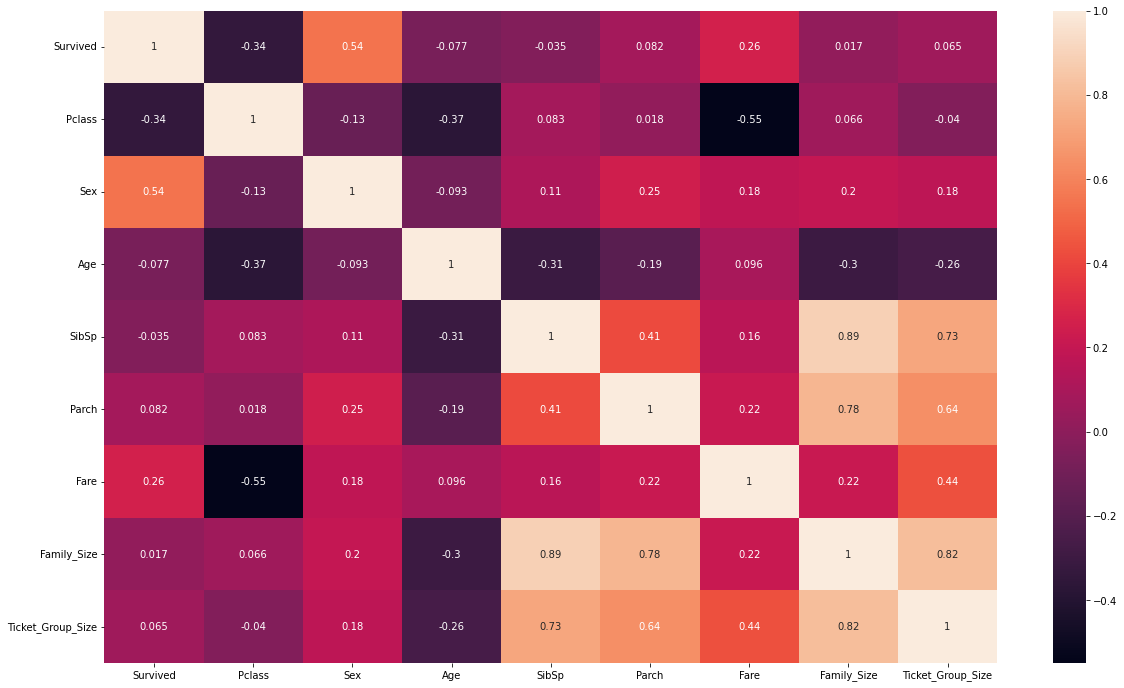

In [13]:
# Set plot size
fig, ax = plt.subplots(figsize=(20, 12))

# Drop PassengerId
df_train = train.drop(["PassengerId"], axis = 1)
# Convert Sex to numnerical
df_train["Sex"] = df_train["Sex"].apply(lambda x: 1 if x == "female" else 0)

dataplot = sns.heatmap(df_train.corr(), annot=True)
# displaying heatmap
plt.show()

#### Get Age by Group

In [14]:
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

In [15]:
age_df = train.groupby(['Pclass','title','Sex']).Age.mean().reset_index()

In [16]:
train['Age'] = train[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)
test['Age'] = test[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)

C:\Users\Aman\AppData\Local\Temp/ipykernel_2288/2338220323.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
C:\Users\Aman\AppData\Local\Temp/ipykernel_2288/4053746285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axi

In [17]:
test = test.drop(["Survived"], axis = 1)